### EDA Fof Benin

### 1. Data Understansing and Data Preparation (Profiling And Cleaning)
** CRISP-DM PAHSE-1 Data Profiling

You cannot model what you don't understand
You can’t extract value from corrupted input.

In [2]:
# Import Libraries 
import sys
import os
sys.path.append(os.path.abspath(".."))
import pandas as pd

In [3]:
# 1. Load dataset:
df = pd.read_csv("../data/benin-malanville.csv")
df.head(10)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
5,2021-08-09 00:06,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3,NaN
6,2021-08-09 00:07,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3,NaN
7,2021-08-09 00:08,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3,NaN
8,2021-08-09 00:09,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4,NaN
9,2021-08-09 00:10,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4,NaN


In [3]:
# 2. Inital Overview:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [4]:
# Describe for numeric value:
df.describe(include='all')

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
unique,525600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-08-09 00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,NaN,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,NaN,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,NaN,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,NaN,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN


In [ ]:
# 3. Convert Time stamp to datetimedf[df]
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# 4. Drop Comments column since it is null
df.drop(columns='Comments', inplace=True)
# Show the data type after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

### 2 EDA 
Descriptive statistics, 
Cheking for 
 ** Anomalies
 ** Missing Value
 ** Outlier Detection
 ** Visualize the data
 ** Group Statistics  

In [14]:
# 2.1 Descriptive statistics for Numerical Value
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743


In [15]:
# 2.2 .Display missing value count for each column
print("\nMissing Value Count per Column:")
missing_values = df.isna().sum()
print(missing_values)


Missing Value Count per Column:
Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


In [ ]:
# 2.3 Identifying columns with more than 5% null
total_rows = len(df)
columns_with_high_nulls = missing_values[missing_values > 0.05 * total_rows]

if not columns_with_high_nulls.empty:
    print("\nColumns with more than 5% nulls:")
    print(columns_with_high_nulls)
else:
    print('\n No Columns with more than 5% null')



 No Columns with more than 5% null


In [32]:
# 2.3 Outlier Detection
#“Noisy or extreme values distort averages, break models, and hide patterns.”
# Missing values = “silent sensors” (we don’t know what really happened)
# Outliers = “broken sensors” or “rare natural events”
# Mathematically, both increase variance, lower signal-to-noise ratio, and can lead to biased models.

import scipy 
from scipy.stats import zscore

In [18]:
# 2.3 outlier detection in  
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols].apply(zscore)
outlier_flags = (z_scores.abs() > 3)
outlier_summary = outlier_flags.sum()
print(outlier_summary)


GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


In [19]:
# 2.4 Replace Outliers with Median 

df_clean = df.copy()

for col in  ['GHI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    z = zscore(df_clean[col])
    median = df_clean[col].median()
    outliers = abs(z) > 3
    print(f"{col}: {outliers.sum()} outliers replaced")
    df_clean.loc[outliers, col] = median

GHI: 89 outliers replaced
DHI: 3738 outliers replaced
ModA: 27 outliers replaced
ModB: 63 outliers replaced
WS: 3109 outliers replaced
WSgust: 3500 outliers replaced


In [21]:
# 2.5 Data Export
df_clean.to_csv("../data/benin_clean.csv", index=False)

#### 3. Time Series Analysis


In [4]:
# Import 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("../data/benin_clean.csv")

In [14]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64
dtypes: 

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.342811,167.187516,110.906983,236.524528,228.737160,28.179683,54.487969,2.082432,2.754888,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,330.868308,261.710501,152.916844,326.815176,316.357415,5.924297,28.073069,1.521898,1.912898,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,482.900000,314.200000,210.500000,463.600000,447.600000,32.300000,80.100000,3.000000,3.900000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1233.000000,952.300000,591.400000,1215.000000,1177.000000,43.800000,100.000000,6.900000,8.700000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


In [15]:
df1.index

Index(['2021-08-09 00:01:00', '2021-08-09 00:02:00', '2021-08-09 00:03:00',
       '2021-08-09 00:04:00', '2021-08-09 00:05:00', '2021-08-09 00:06:00',
       '2021-08-09 00:07:00', '2021-08-09 00:08:00', '2021-08-09 00:09:00',
       '2021-08-09 00:10:00',
       ...
       '2022-08-08 23:51:00', '2022-08-08 23:52:00', '2022-08-08 23:53:00',
       '2022-08-08 23:54:00', '2022-08-08 23:55:00', '2022-08-08 23:56:00',
       '2022-08-08 23:57:00', '2022-08-08 23:58:00', '2022-08-08 23:59:00',
       '2022-08-09 00:00:00'],
      dtype='object', name='Timestamp', length=525600)

In [20]:
df1.index = pd.to_datetime(df1.index)
df1['Hour'] = df1.index.hour
df1['Month'] = df1.index.month
df1['Quarter'] = df1.index.quarter


### 3.1 Daily Time Trend

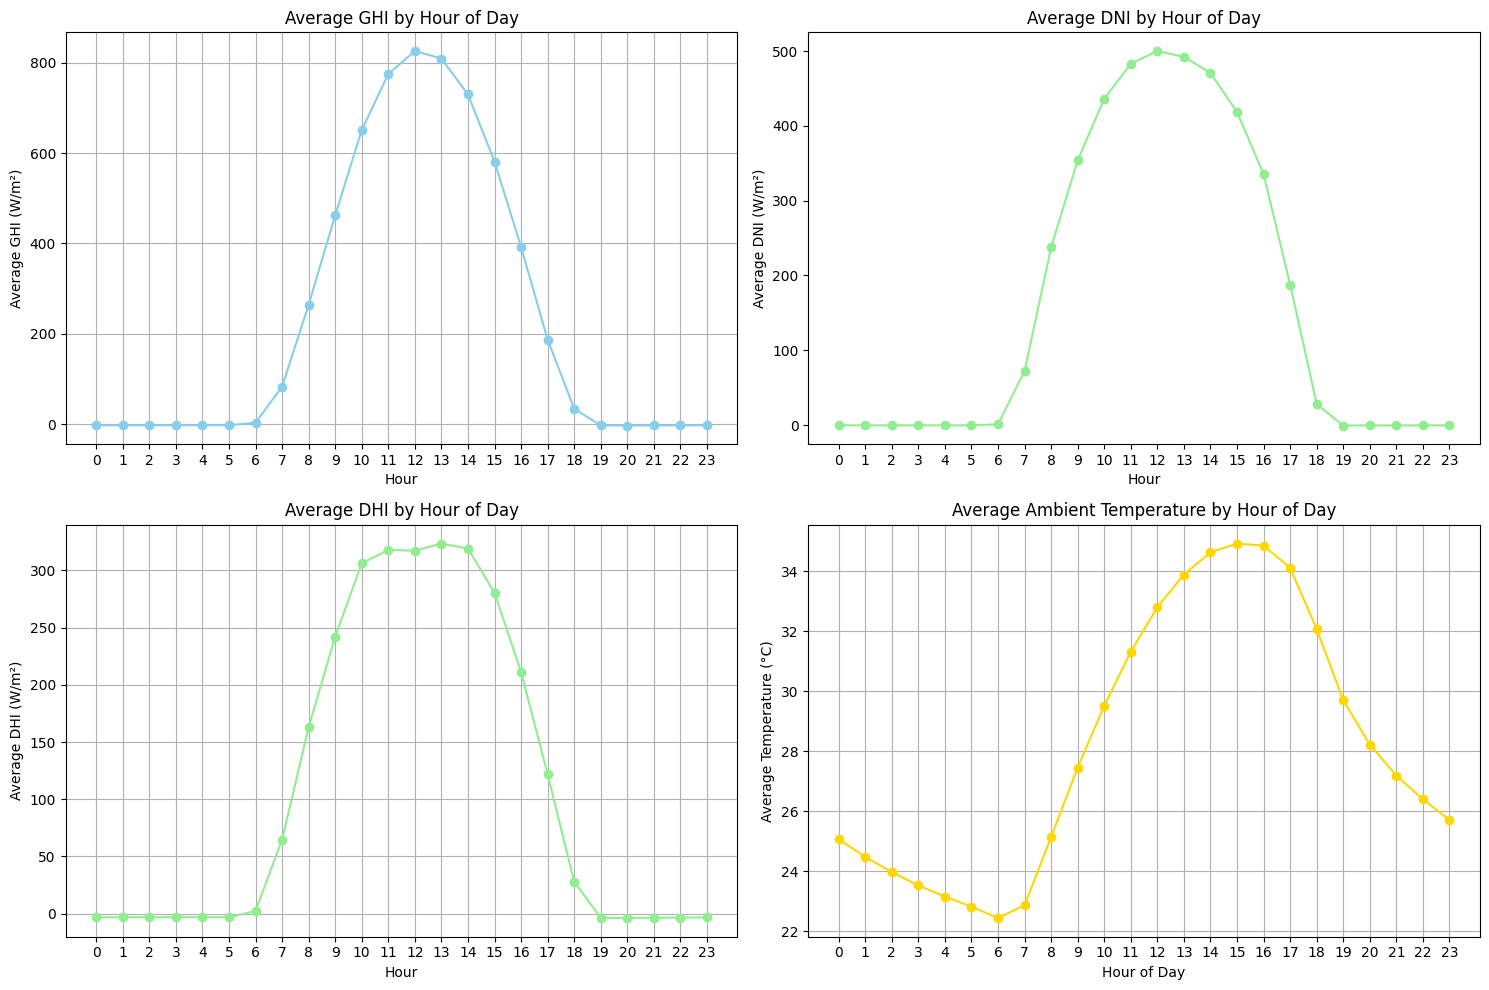

In [26]:
# 3.1 Daily Time Trend
# Extract time features

df1_hourly = df1.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
plt.figure(figsize=(15, 10))

# Plot daily trend for GHI
plt.subplot(2, 2, 1)
df1_hourly['GHI'].plot(kind='line', marker='o', color='skyblue')
plt.ylabel('Average GHI (W/m²)')
plt.title('Average GHI by Hour of Day')
plt.xticks(df1_hourly.index)
plt.grid(True)

# Plot daily trend for 'DNI'
plt.subplot(2, 2, 2)
df1_hourly['DNI'].plot(kind='line', marker='o', color='lightgreen')
plt.ylabel('Average DNI (W/m²)')
plt.title('Average DNI by Hour of Day')
plt.xticks(df1_hourly.index)

plt.subplot(2, 2, 3)
df1_hourly['DHI'].plot(kind='line', marker='o', color='lightgreen')
plt.ylabel('Average DHI (W/m²)')
plt.title('Average DHI by Hour of Day')
plt.xticks(df1_hourly.index)
plt.grid(True)

plt.subplot(2, 2, 4)
df1_hourly['Tamb'].plot(kind='line', marker='o', color='gold')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Ambient Temperature by Hour of Day')
plt.xlabel('Hour of Day')
plt.xticks(df1_hourly.index)

plt.grid(True)
plt.tight_layout()
plt.show()


### 3.2 Monthly Solar Trend Bar Chart 

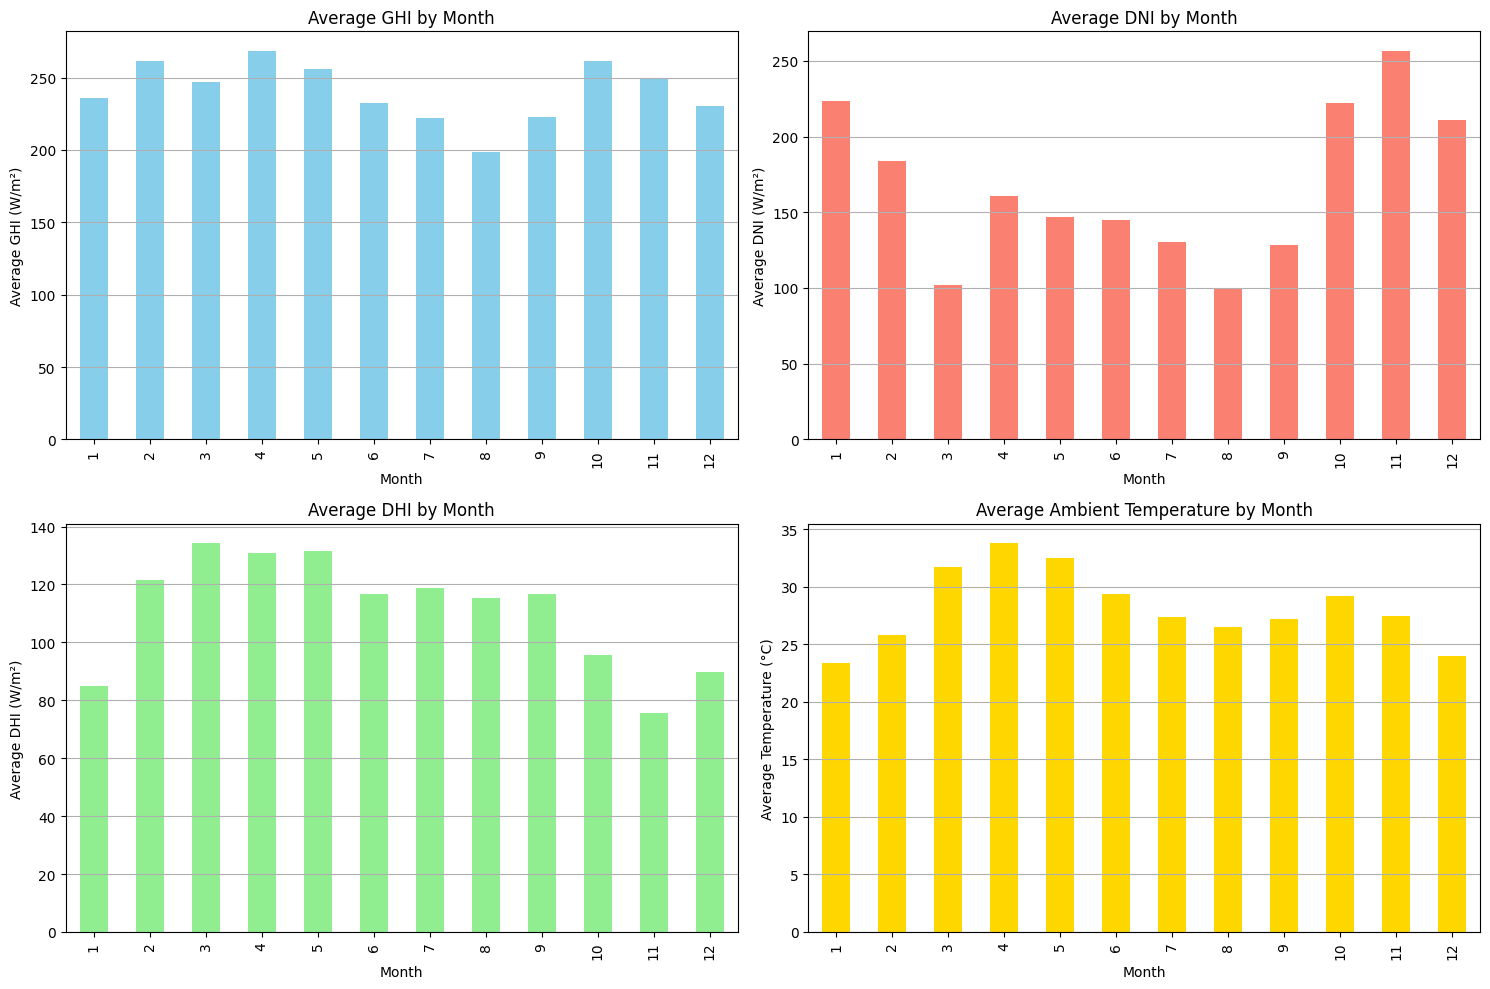

In [ ]:
#Observe patterns by month - Aggregate data by month
 
df1_monthly = df1.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df1_monthly['GHI'].plot(kind='bar', color='skyblue')
plt.ylabel('Average GHI (W/m²)')
plt.title('Average GHI by Month')
plt.grid(axis='y')

plt.subplot(2, 2, 2)
df1_monthly['DNI'].plot(kind='bar', color='salmon')
plt.ylabel('Average DNI (W/m²)')
plt.title('Average DNI by Month')
plt.grid(axis='y')

plt.subplot(2, 2, 3)
df1_monthly['DHI'].plot(kind='bar', color='lightgreen')
plt.ylabel('Average DHI (W/m²)')
plt.title('Average DHI by Month')
plt.grid(axis='y')

plt.subplot(2, 2, 4)
df1_monthly['Tamb'].plot(kind='bar', color='gold')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Ambient Temperature by Month')
plt.xlabel('Month')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### 3.3 Showing Quarterly Trends

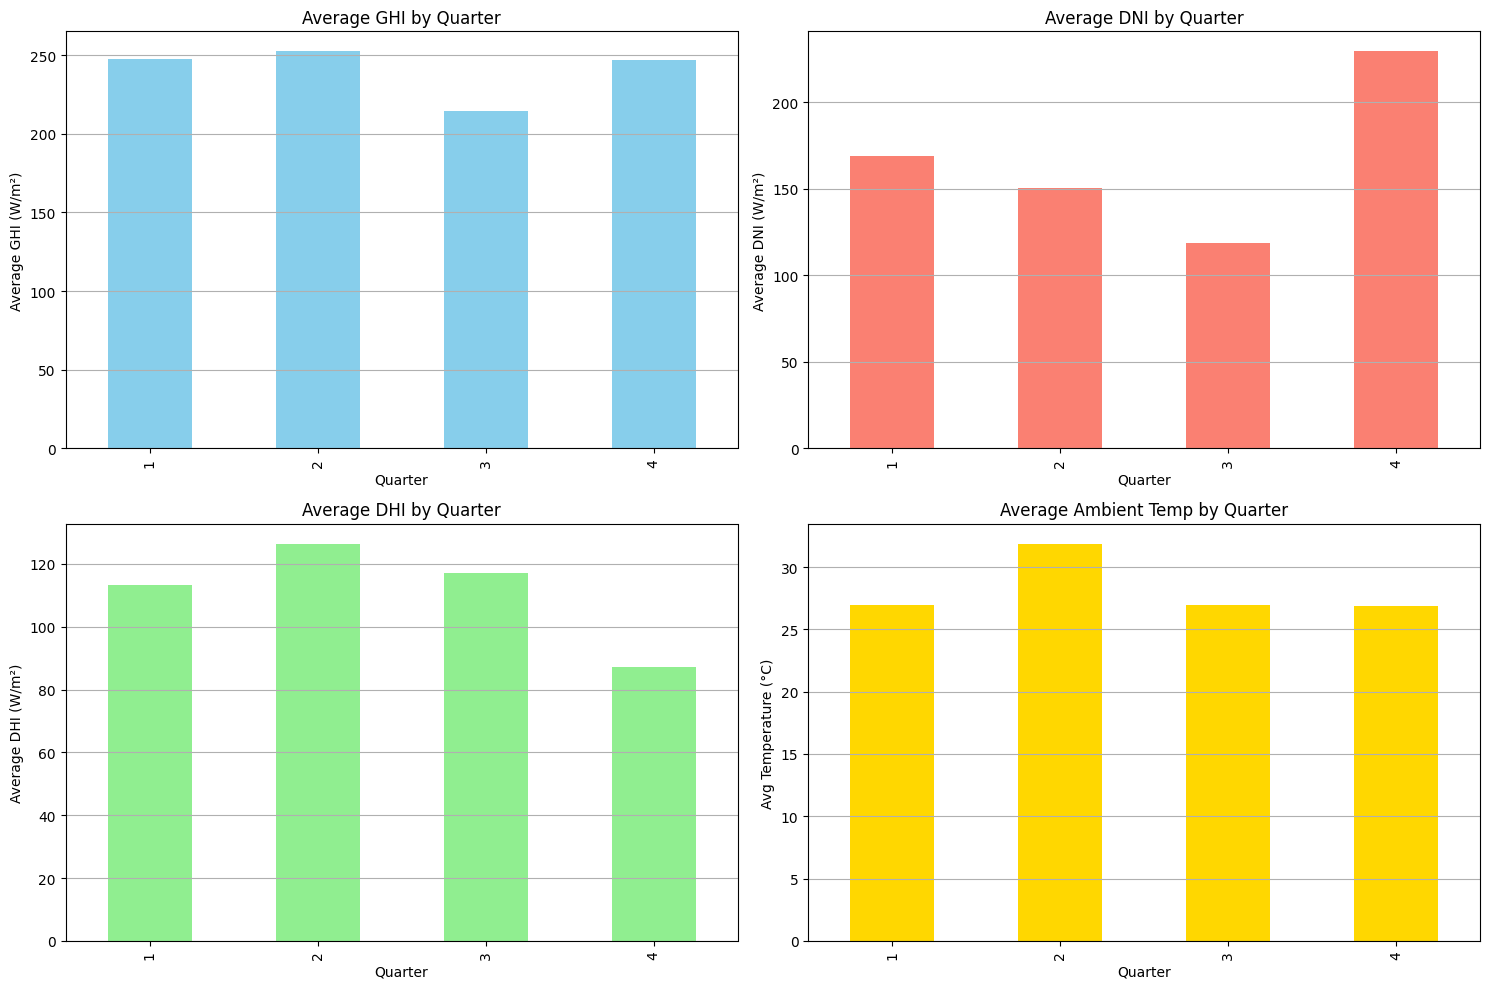

In [29]:
# Step 1: Extract Quarter from datetime index

# Step 2: Group by Quarter and calculate mean
df1_quarterly = df1.groupby('Quarter')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Step 3: Plot (2x2 grid)
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df1_quarterly['GHI'].plot(kind='bar', color='skyblue')
plt.ylabel('Average GHI (W/m²)')
plt.title('Average GHI by Quarter')
plt.grid(axis='y')

plt.subplot(2, 2, 2)
df1_quarterly['DNI'].plot(kind='bar', color='salmon')
plt.ylabel('Average DNI (W/m²)')
plt.title('Average DNI by Quarter')
plt.grid(axis='y')

plt.subplot(2, 2, 3)
df1_quarterly['DHI'].plot(kind='bar', color='lightgreen')
plt.ylabel('Average DHI (W/m²)')
plt.title('Average DHI by Quarter')
plt.grid(axis='y')

plt.subplot(2, 2, 4)
df1_quarterly['Tamb'].plot(kind='bar', color='gold')
plt.ylabel('Avg Temperature (°C)')
plt.title('Average Ambient Temp by Quarter')
plt.xlabel('Quarter')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### 3.3 Anomalies 
peaks in solar irradiance or temperature fluctuations. 



Anomalies detected (Z-score > 3 or < -3):
GHI anomalies:
                                  GHI  GHI_zscore
1970-01-01 00:00:00.000000671  1274.0    3.120942
1970-01-01 00:00:00.000000674  1349.0    3.347438
1970-01-01 00:00:00.000000676  1334.0    3.302139
1970-01-01 00:00:00.000000849  1253.0    3.057523
1970-01-01 00:00:00.000000850  1324.0    3.271939

DNI anomalies:
Empty DataFrame
Columns: [DNI, DNI_zscore]
Index: []

DHI anomalies:
                                 DHI  DHI_zscore
1970-01-01 00:00:00.000000670  610.6    3.120790
1970-01-01 00:00:00.000000671  615.2    3.149777
1970-01-01 00:00:00.000000672  612.8    3.134653
1970-01-01 00:00:00.000000673  593.2    3.011143
1970-01-01 00:00:00.000000674  618.0    3.167421

Tamb anomalies:
Empty DataFrame
Columns: [Tamb, Tamb_zscore]
Index: []


C:\Users\ssss\AppData\Local\Temp\ipykernel_12240\3318321318.py:69: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


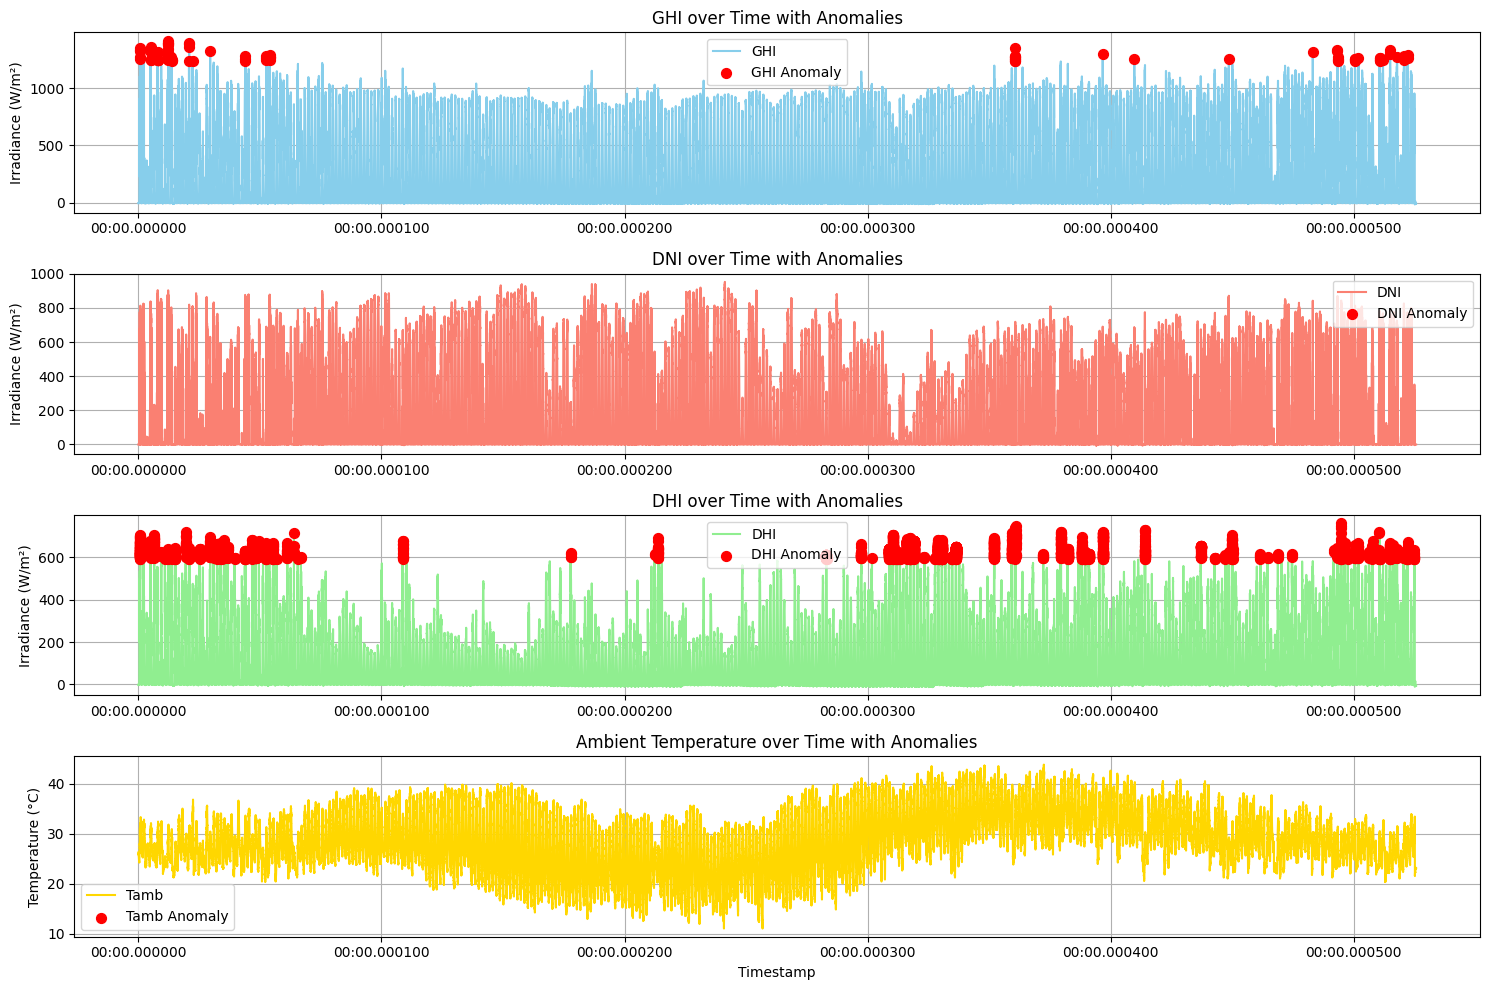

In [33]:
# Trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations.
# Anomalies - Simple Z-score outlier detection
# Calculate Z-scores for relevant columns
df.index = pd.to_datetime(df.index)

df['GHI_zscore'] = zscore(df['GHI'])
df['DNI_zscore'] = zscore(df['DNI'])
df['DHI_zscore'] = zscore(df['DHI'])
df['Tamb_zscore'] = zscore(df['Tamb'])

# Define threshold for anomalies (e.g., Z-score > 3 or < -3)
z_threshold = 3

# Find anomalies
anomalies_ghi = df[abs(df['GHI_zscore']) > z_threshold]
anomalies_dni = df[abs(df['DNI_zscore']) > z_threshold]
anomalies_dhi = df[abs(df['DHI_zscore']) > z_threshold]
anomalies_tamb = df[abs(df['Tamb_zscore']) > z_threshold]

print("\nAnomalies detected (Z-score > {} or < {}):".format(z_threshold, -z_threshold))
print("GHI anomalies:")
print(anomalies_ghi[['GHI', 'GHI_zscore']].head())

print("\nDNI anomalies:")
print(anomalies_dni[['DNI', 'DNI_zscore']].head())

print("\nDHI anomalies:")
print(anomalies_dhi[['DHI', 'DHI_zscore']].head())

print("\nTamb anomalies:")
print(anomalies_tamb[['Tamb', 'Tamb_zscore']].head())

# Optional: Visualize anomalies on the time series plots
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='skyblue')
plt.scatter(anomalies_ghi.index, anomalies_ghi['GHI'], color='red', label='GHI Anomaly', s=50, zorder=5)
plt.ylabel('Irradiance (W/m²)')
plt.title('GHI over Time with Anomalies')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='salmon')
plt.scatter(anomalies_dni.index, anomalies_dni['DNI'], color='red', label='DNI Anomaly', s=50, zorder=5)
plt.ylabel('Irradiance (W/m²)')
plt.title('DNI over Time with Anomalies')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='lightgreen')
plt.scatter(anomalies_dhi.index, anomalies_dhi['DHI'], color='red', label='DHI Anomaly', s=50, zorder=5)
plt.ylabel('Irradiance (W/m²)')
plt.title('DHI over Time with Anomalies')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='gold')
plt.scatter(anomalies_tamb.index, anomalies_tamb['Tamb'], color='red', label='Tamb Anomaly', s=50, zorder=5)
plt.ylabel('Temperature (°C)')
plt.title('Ambient Temperature over Time with Anomalies')
plt.xlabel('Timestamp')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### 3.4 Cleaning Impact

                ModA        ModB
Cleaning                        
0         236.459225  228.669520
1         307.229278  301.972165


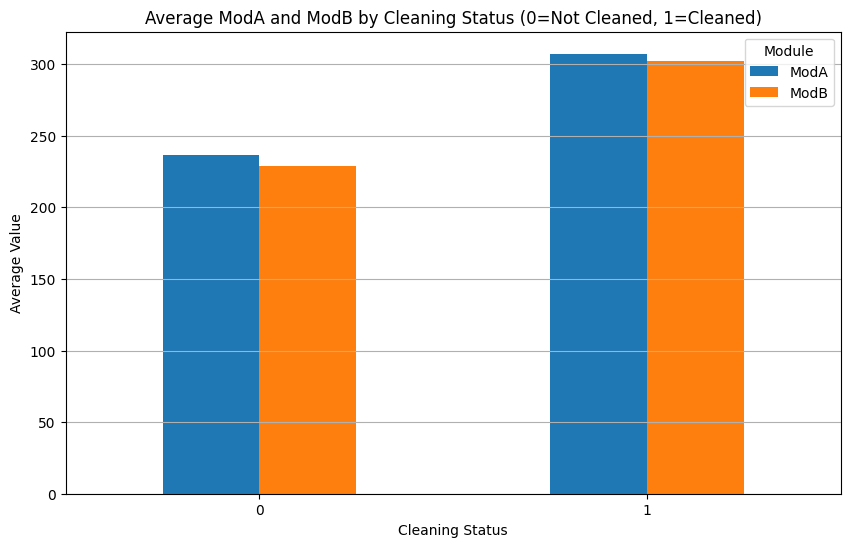

In [ ]:
cleaning_grouped = df1.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_grouped)

# Plotting the results
cleaning_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Average ModA and ModB by Cleaning Status (0=Not Cleaned, 1=Cleaned)')
plt.xlabel('Cleaning Status')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Module')
plt.show()

### 4. Correlation & Relationship Analysis


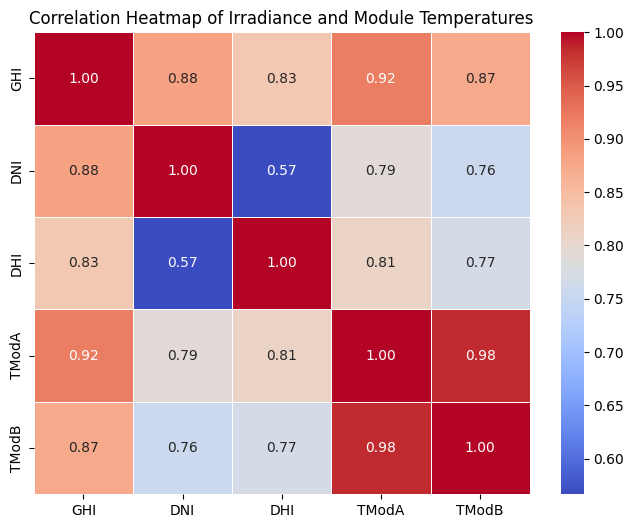

In [ ]:
# 4.1  Correlation Analysis - Heatmap
#Heatmap of correlations (GHI, DNI, DHI, TModA, TModB)

# Select the relevant columns for correlation
correlation_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Calculate the correlation matrix
correlation_matrix = df1[correlation_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Irradiance and Module Temperatures')
plt.show()

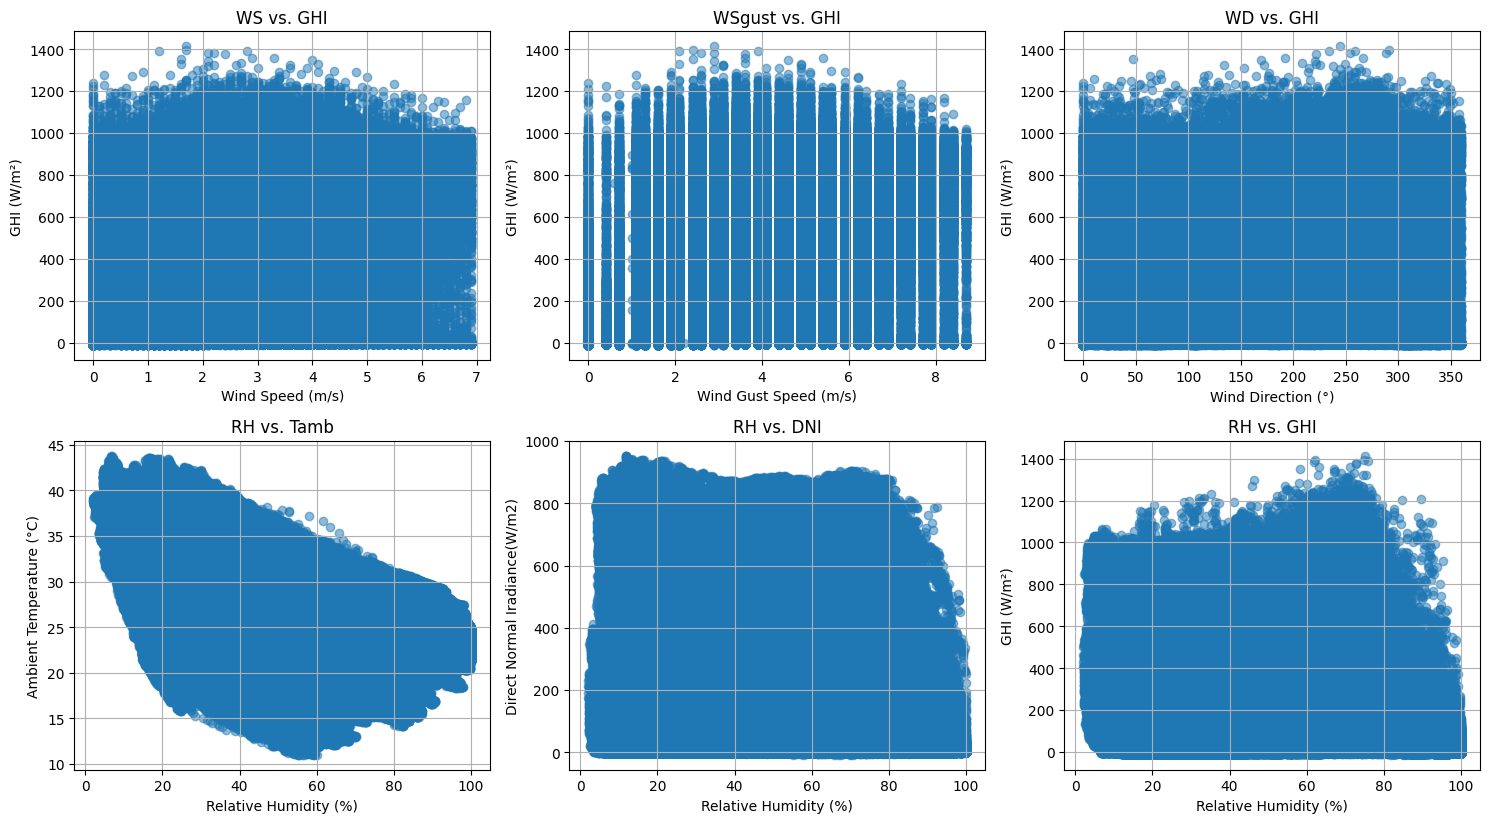

In [40]:
# 4.2 Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

plt.figure(figsize=(15, 12))

# WS vs. GHI
plt.subplot(3, 3, 1)
plt.scatter(df1['WS'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.title('WS vs. GHI')
plt.grid(True)

# WSgust vs. GHI
plt.subplot(3, 3, 2)
plt.scatter(df1['WSgust'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Gust Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.title('WSgust vs. GHI')
plt.grid(True)

# WD vs. GHI
plt.subplot(3, 3, 3)
plt.scatter(df1['WD'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Direction (°)')
plt.ylabel('GHI (W/m²)')
plt.title('WD vs. GHI')
plt.grid(True)

# RH vs. Tamb
plt.subplot(3, 3, 4)
plt.scatter(df1['RH'], df['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('RH vs. Tamb')
plt.grid(True)

# RH vs. GNI
plt.subplot(3, 3, 5)
plt.scatter(df1['RH'], df['DNI'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Direct Normal Iradiance(W/m2)')
plt.title('RH vs. DNI')
plt.grid(True)


plt.subplot(3, 3, 6)
# RH vs. GHI
plt.scatter(df1['RH'], df['GHI'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.title('RH vs. GHI')
plt.grid(True)

plt.tight_layout()
plt.show()

### 5. Wind & Distribution Analysis


In [ ]:
from windrose import WindroseAxes

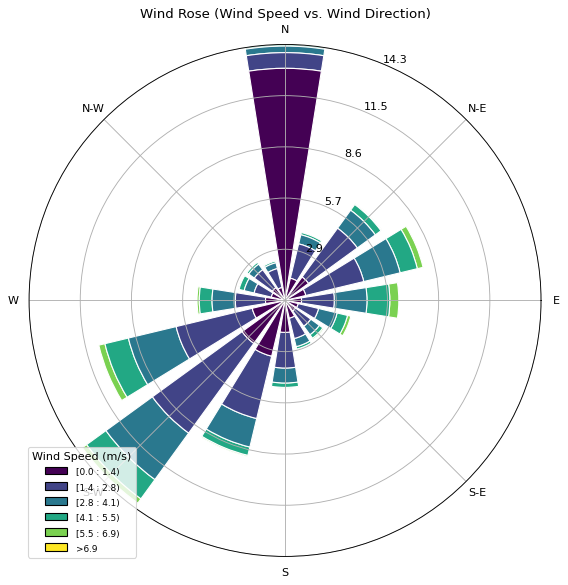

In [ ]:
# 5.1 Wind direction plot 
# Ensure 'WS' and 'WD' columns exist
  # Create a WindroseAxes instance
ax = WindroseAxes.from_ax()

  # Plot the wind rose using WS and WD data
ax.bar(df1['WD'], df1['WS'], normed=True, opening=0.8, edgecolor='white')

  # Set the title
ax.set_title('Wind Rose (Wind Speed vs. Wind Direction)')

  # Add a legend
ax.set_legend(title='Wind Speed (m/s)')

  # Display the plot
plt.show()

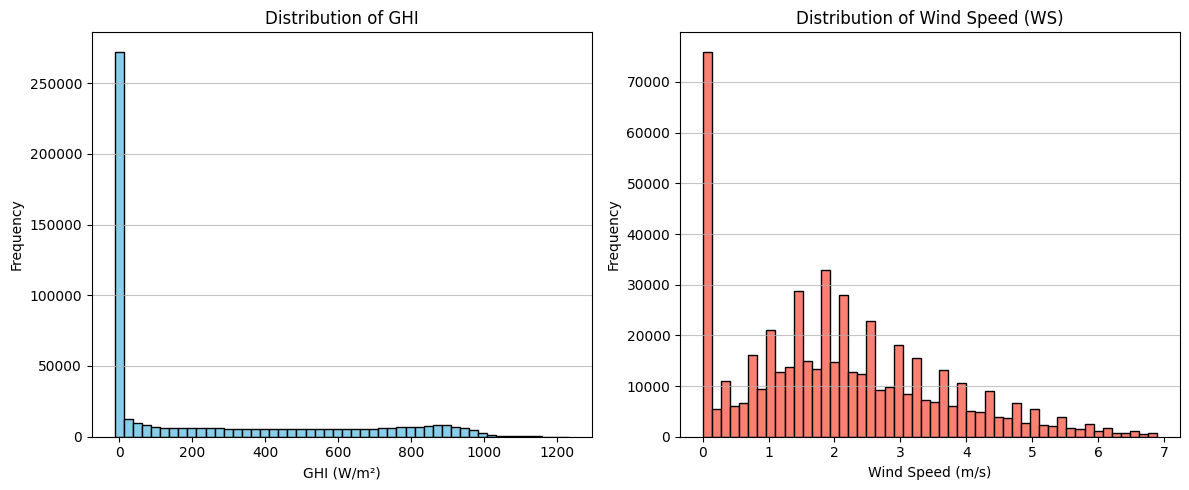

In [ ]:
# 5.2 Wind Bar plots
# Histograms for GHI and WS
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df1['GHI'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.title('Distribution of GHI')
plt.grid(axis='y', alpha=0.75)

plt.subplot(1, 2, 2)
plt.hist(df1['WS'], bins=50, color='salmon', edgecolor='black')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed (WS)')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### 6. Temperature Analysis


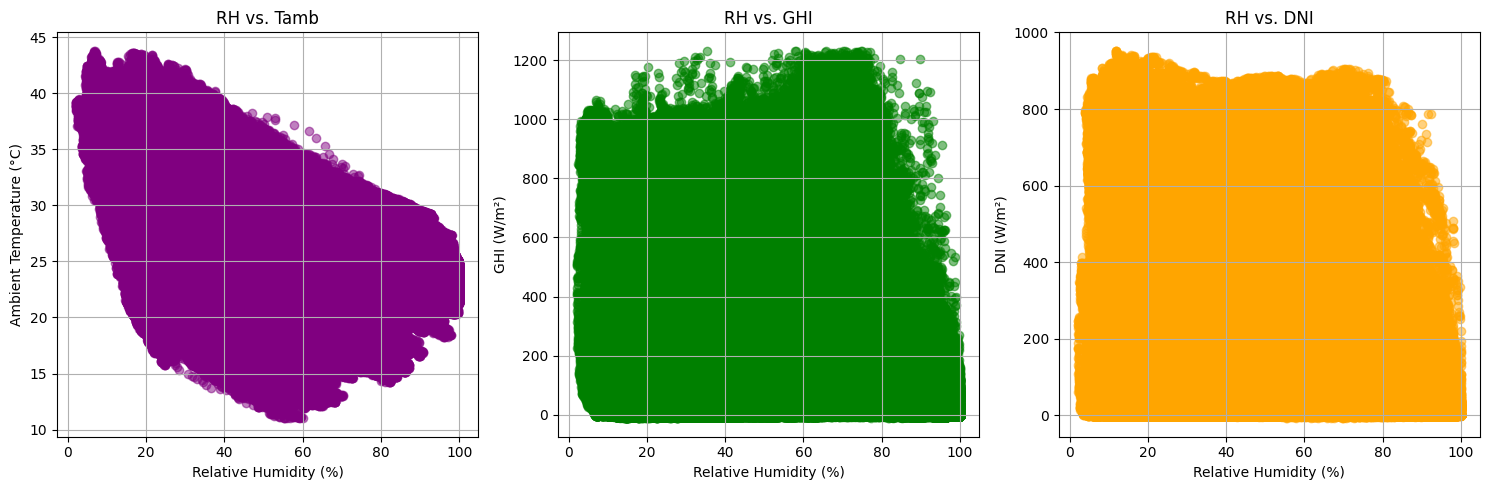


Correlation of Relative Humidity with other variables:
RH      1.000000
Tamb   -0.414842
GHI    -0.360029
DNI    -0.373475
DHI    -0.285018
Name: RH, dtype: float64


In [55]:
# Examine how relative humidity (RH) might influence temperature readings and solar radiation

# Analyze the relationship between RH and Temperature (Tamb) and Solar Radiation (GHI, DNI, DHI)
plt.figure(figsize=(15, 5))

# RH vs. Tamb
plt.subplot(1, 3, 1)
plt.scatter(df1['RH'], df1['Tamb'], alpha=0.5, color='purple')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('RH vs. Tamb')
plt.grid(True)

# RH vs. GHI
plt.subplot(1, 3, 2)
plt.scatter(df1['RH'], df1['GHI'], alpha=0.5, color='green')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.title('RH vs. GHI')
plt.grid(True)

# RH vs. DNI
plt.subplot(1, 3, 3)
plt.scatter(df1['RH'], df1['DNI'], alpha=0.5, color='orange')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')
plt.title('RH vs. DNI')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print correlations between RH and other variables
print("\nCorrelation of Relative Humidity with other variables:")
print(df[['RH', 'Tamb', 'GHI', 'DNI', 'DHI']].corr()['RH'])

### 7. Bubble Chart


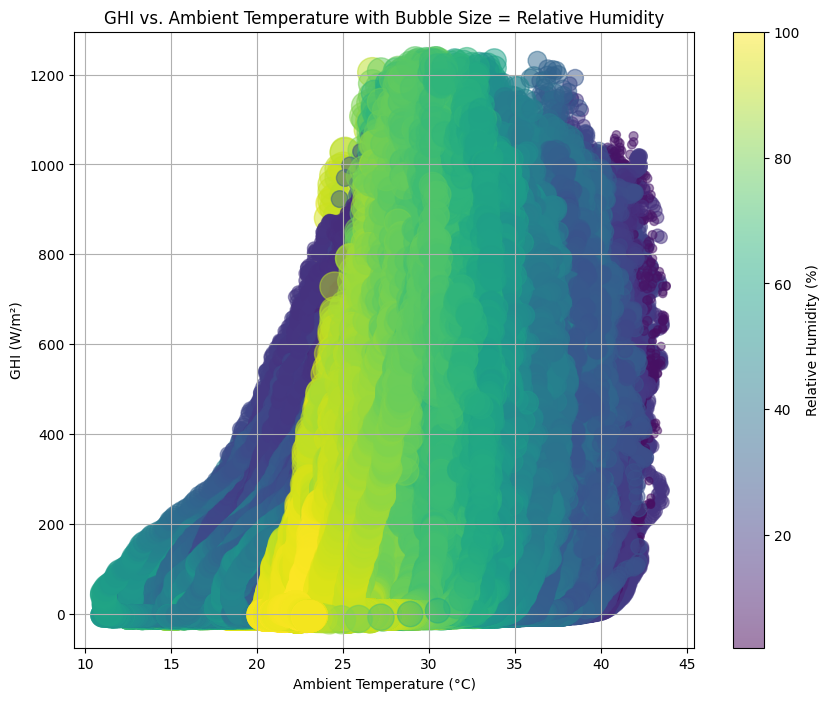

In [56]:
# GHI vs. Tamb with bubble size = RH 
plt.figure(figsize=(10, 8))  
plt.scatter(df1['Tamb'], df1['GHI'], s=df1['RH']*5, alpha=0.5, c=df1['RH'], cmap='viridis')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs. Ambient Temperature with Bubble Size = Relative Humidity')
plt.colorbar(label='Relative Humidity (%)')
plt.grid(True)
plt.show()
plt.show()